In [109]:
from edge_prog_2d import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import scipy.misc
from scipy import ndimage
import image

plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='Times')
plt.rc('')

In [110]:
def make_circle():
    x = np.linspace(-63,64,128)
    y = np.linspace(-63,64,128)
    X, Y = np.meshgrid(x,y)
    C = np.zeros([128,128])
    for i in range(128):
        for j in range(128):
            xx = X[i,j]
            yy = Y[i,j]
            if (xx**2 + yy**2 < 32**2):
                C[i,j] = 1;
    C[64,:] = 1; C[:,64] = 1;
    return C
C = make_circle()
I1 = plt.imread('./edge_data/image2.png')
I1 = I1[:,:,1]

## For Circle

In [111]:
H0, V0 = cwt_2d(C, 0.05)
M0, A0, MM0 = wtmm_2d(H0, V0)

/Users/lida/Desktop/MATH-651-Project/edge_prog_2d.py:34: RuntimeWarning: divide by zero encountered in true_divide
  A = V / H


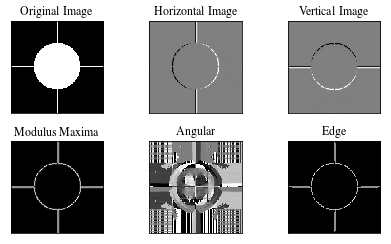

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[6,3.5])
axes[0,0].imshow(C, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

axes[0,1].imshow(H0, cmap='gray')
axes[0,1].set_title('Horizontal Image')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

axes[0,2].imshow(V0, cmap='gray')
axes[0,2].set_title('Vertical Image')
axes[0,2].set_xticks([])
axes[0,2].set_yticks([])

axes[1,0].imshow(M0, cmap='gray')
axes[1,0].set_title('Modulus Maxima')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

axes[1,1].imshow(A0, cmap='gray')
axes[1,1].set_title('Angular')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

axes[1,2].imshow(MM0, cmap='gray')
axes[1,2].set_title('Edge')
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

plt.tight_layout()

fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite/report_image/edge2_circle.pdf', dpi=300)
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite-2/report_image/edge2_circle.pdf', dpi=300)

## For test image

In [113]:
H1, V1 = cwt_2d(I1, 0.2)
M1, A1, MM1 = wtmm_2d(H1, V1)

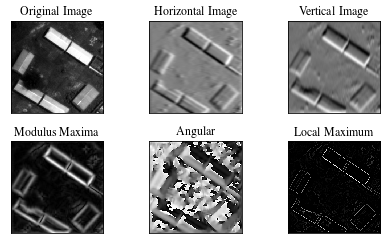

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[6,3.5])
axes[0,0].imshow(I1, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

axes[0,1].imshow(H1, cmap='gray')
axes[0,1].set_title('Horizontal Image')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

axes[0,2].imshow(V1, cmap='gray')
axes[0,2].set_title('Vertical Image')
axes[0,2].set_xticks([])
axes[0,2].set_yticks([])

axes[1,0].imshow(M1, cmap='gray')
axes[1,0].set_title('Modulus Maxima')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

axes[1,1].imshow(A1, cmap='gray')
axes[1,1].set_title('Angular')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

axes[1,2].imshow(MM1, cmap='gray')
axes[1,2].set_title('Local Maximum')
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

plt.tight_layout()

fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite/report_image/edge2_satellite1.pdf', dpi=300)
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite-2/report_image/edge2_satellite1.pdf', dpi=300)

In [115]:
scale = np.linspace(-4, -1, 6);
scale = 2**scale

MM = np.ndarray([H1.shape[0],H1.shape[1],6])
for i in range(6):
    H1, V1 = cwt_2d(I1, scale[i]) 
    M1, A1, MM[:,:,i] = wtmm_2d(H1, V1)

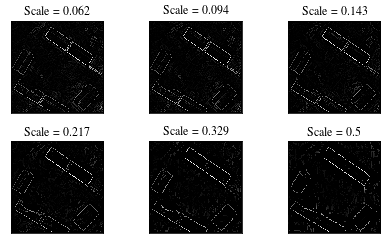

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[6,3.5])
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[12,8])
axes[0,0].imshow(MM[:,:,0], cmap='gray')
title = 'Scale = '
title = title + str(scale[0])[0:5]
axes[0,0].set_title(title)
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

axes[0,1].imshow(MM[:,:,1], cmap='gray')
title = 'Scale = '
title = title + str(scale[1])[0:5]
axes[0,1].set_title(title)
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

axes[0,2].imshow(MM[:,:,2], cmap='gray')
title = 'Scale = '
title = title + str(scale[2])[0:5]
axes[0,2].set_title(title)
axes[0,2].set_xticks([])
axes[0,2].set_yticks([])

axes[1,0].imshow(MM[:,:,3], cmap='gray')
title = 'Scale = '
title = title + str(scale[3])[0:5]
axes[1,0].set_title(title)
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

axes[1,1].imshow(MM[:,:,4], cmap='gray')
title = 'Scale = '
title = title + str(scale[4])[0:5]
axes[1,1].set_title(title)
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

axes[1,2].imshow(MM[:,:,5], cmap='gray')
title = 'Scale = '
title = title + str(scale[5])[0:5]
axes[1,2].set_title(title)
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

plt.tight_layout()

fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite/report_image/edge2_satellite2.pdf', dpi=300)
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite-2/report_image/edge2_satellite2.pdf', dpi=300)

## LE

In [117]:
I1 = plt.imread('./edge_data/image1.png')
I2 = plt.imread('./edge_data/image2.png')
I3 = plt.imread('./edge_data/image3.png')
I1 = I1[:,:,1]
I2 = I2[:,:,1]
I3 = I3[:,:,1]

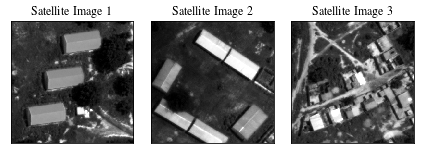

In [118]:
fig, [ax0,ax1,ax2] = plt.subplots(ncols=3, figsize=[6,3])
ax0.imshow(I1,cmap='gray')
ax0.set_xticks([]);
ax0.set_yticks([]);
ax0.set_title('Satellite Image 1')

ax1.imshow(I2,cmap='gray')
ax1.set_xticks([]);
ax1.set_yticks([]);
ax1.set_title('Satellite Image 2')

ax2.imshow(I3,cmap='gray')
ax2.set_xticks([]);
ax2.set_yticks([]);
ax2.set_title('Satellite Image 3')

plt.tight_layout()
# fig.savefig('/Users/lida/Desktop/report/report_image/edge2_satellite2.pdf')

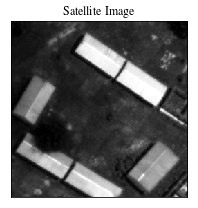

In [119]:
fig, ax0 = plt.subplots(ncols=1, figsize=[6,3])
ax0.imshow(I2,cmap='gray')
ax0.set_xticks([]);
ax0.set_yticks([]);
ax0.set_title('Satellite Image')

plt.tight_layout()
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite/report_image/edge2_satellite3.pdf')

In [120]:
scale = np.linspace(-7, -4, 8);
scale = 2**scale

E1 = cal_multi_edge(I1, scale)

a, ind, val, s = LE_2d(E1, scale, 0.1)

th = np.linspace(-0.6,-0.10,6)
Lip1 = np.ndarray([E1.shape[0], E1.shape[1], 6])
E_one1 = np.ndarray([E1.shape[0], E1.shape[1], 6])
E_val1 = np.ndarray([E1.shape[0], E1.shape[1], 6])
for i in range(6):
    Lip1[:,:,i], E_one1[:,:,i], E_val1[:,:,i] = ex_edge_by_Lip(E1, a, ind, th[i])

/Users/lida/Desktop/MATH-651-Project/edge_prog_2d.py:34: RuntimeWarning: divide by zero encountered in true_divide
  A = V / H
/Users/lida/Desktop/MATH-651-Project/edge_prog_2d.py:131: RuntimeWarning: divide by zero encountered in log2
  val1[i,:] = np.log2(val[i,:])


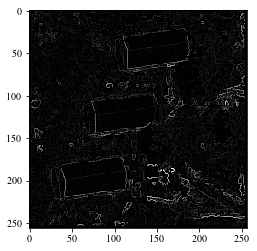

In [121]:
plt.imshow(E1[:,:,1],cmap='gray')


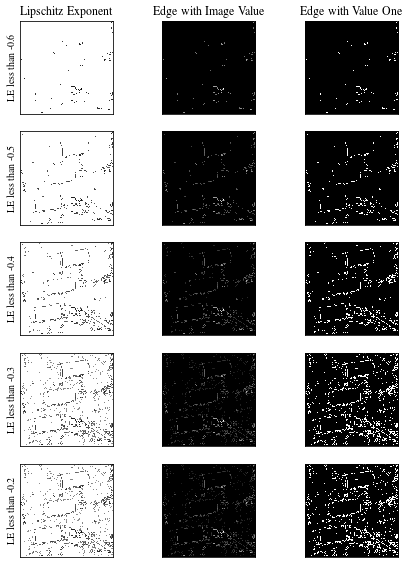

In [122]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=[6,8])
for i in range(5):
    axes[i,0].imshow(Lip1[:,:,i],cmap='gray')
    axes[i,0].set_xticks([]);
    axes[i,0].set_yticks([]);
    
    axes[i,1].imshow(E_val1[:,:,i],cmap='gray')
    axes[i,1].set_xticks([]);
    axes[i,1].set_yticks([]);
    
    axes[i,2].imshow(E_one1[:,:,i],cmap='gray')
    axes[i,2].set_xticks([]);
    axes[i,2].set_yticks([]);
    
for i in range(5):
    ytitle = 'LE less than '
    ytitle = ytitle + str(th[i])
    axes[i,0].set_ylabel(ytitle)

axes[0,0].set_title('Lipschitz Exponent')
axes[0,1].set_title('Edge with Image Value')
axes[0,2].set_title('Edge with Value One')

plt.tight_layout()
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite/report_image/edge2_LE_I1.pdf', dpi=300)

In [123]:
scale = np.linspace(-7, -4, 8);
scale = 2**scale

E2 = cal_multi_edge(I2, scale)

a, ind, val, s = LE_2d(E2, scale, 0.1)

th = np.linspace(-0.6,-0.35,6)
Lip2 = np.ndarray([E2.shape[0], E2.shape[1], 6])
E_one2 = np.ndarray([E2.shape[0], E2.shape[1], 6])
E_val2 = np.ndarray([E2.shape[0], E2.shape[1], 6])
for i in range(6):
    Lip2[:,:,i], E_one2[:,:,i], E_val2[:,:,i] = ex_edge_by_Lip(E2, a, ind, th[i])

/Users/lida/Desktop/MATH-651-Project/edge_prog_2d.py:34: RuntimeWarning: divide by zero encountered in true_divide
  A = V / H
/Users/lida/Desktop/MATH-651-Project/edge_prog_2d.py:131: RuntimeWarning: divide by zero encountered in log2
  val1[i,:] = np.log2(val[i,:])


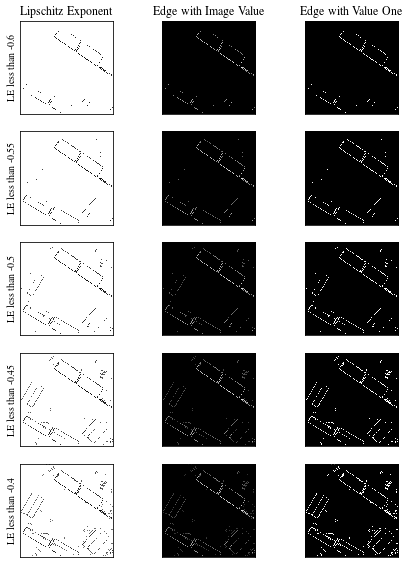

In [124]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=[6,8])
for i in range(5):
    axes[i,0].imshow(Lip2[:,:,i],cmap='gray')
    axes[i,0].set_xticks([]);
    axes[i,0].set_yticks([]);
    
    axes[i,1].imshow(E_val2[:,:,i],cmap='gray')
    axes[i,1].set_xticks([]);
    axes[i,1].set_yticks([]);
    
    axes[i,2].imshow(E_one2[:,:,i],cmap='gray')
    axes[i,2].set_xticks([]);
    axes[i,2].set_yticks([]);
    
for i in range(5):
    ytitle = 'LE less than '
    ytitle = ytitle + str(th[i])
    axes[i,0].set_ylabel(ytitle)

axes[0,0].set_title('Lipschitz Exponent')
axes[0,1].set_title('Edge with Image Value')
axes[0,2].set_title('Edge with Value One')

plt.tight_layout()
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite/report_image/edge2_LE_I2.pdf', dpi=300)

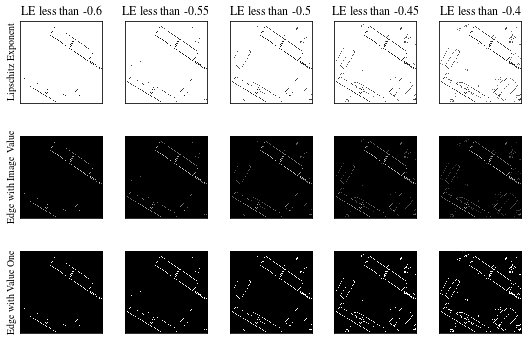

In [125]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=[7.5,5])
for i in range(5):
    axes[0,i].imshow(Lip2[:,:,i],cmap='gray')
    axes[0,i].set_xticks([]);
    axes[0,i].set_yticks([]);
    
    axes[1,i].imshow(E_val2[:,:,i],cmap='gray')
    axes[1,i].set_xticks([]);
    axes[1,i].set_yticks([]);
    
    axes[2,i].imshow(E_one2[:,:,i],cmap='gray')
    axes[2,i].set_xticks([]);
    axes[2,i].set_yticks([]);
    
for i in range(5):
    ytitle = 'LE less than '
    ytitle = ytitle + str(th[i])
    axes[0,i].set_title(ytitle)

axes[0,0].set_ylabel('Lipschitz Exponent')
axes[1,0].set_ylabel('Edge with Image Value')
axes[2,0].set_ylabel('Edge with Value One')

plt.tight_layout()
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite-2/report_image/edge2_LE_I2.pdf', dpi=300)

In [126]:
scale = np.linspace(-7, -4, 8);
scale = 2**scale

E3 = cal_multi_edge(I3, scale)

a, ind, val, s = LE_2d(E3, scale, 0.1)

th = np.linspace(-0.6,-0.35,6)
Lip3 = np.ndarray([E3.shape[0], E3.shape[1], 6])
E_one3 = np.ndarray([E3.shape[0], E3.shape[1], 6])
E_val3 = np.ndarray([E3.shape[0], E3.shape[1], 6])
for i in range(6):
    Lip3[:,:,i], E_one3[:,:,i], E_val3[:,:,i] = ex_edge_by_Lip(E3, a, ind, th[i])

/Users/lida/Desktop/MATH-651-Project/edge_prog_2d.py:34: RuntimeWarning: divide by zero encountered in true_divide
  A = V / H
/Users/lida/Desktop/MATH-651-Project/edge_prog_2d.py:131: RuntimeWarning: divide by zero encountered in log2
  val1[i,:] = np.log2(val[i,:])


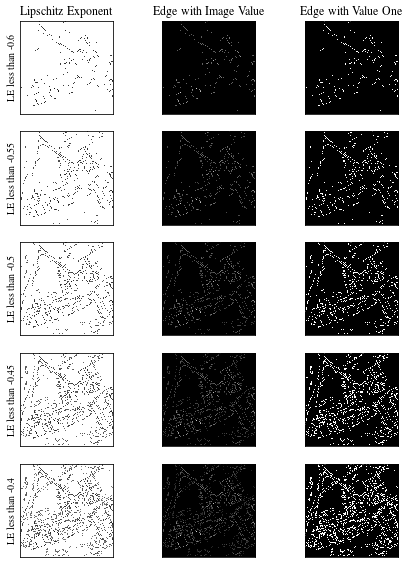

In [127]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=[6,8])
for i in range(5):
    axes[i,0].imshow(Lip3[:,:,i],cmap='gray')
    axes[i,0].set_xticks([]);
    axes[i,0].set_yticks([]);
    
    axes[i,1].imshow(E_val3[:,:,i],cmap='gray')
    axes[i,1].set_xticks([]);
    axes[i,1].set_yticks([]);
    
    axes[i,2].imshow(E_one3[:,:,i],cmap='gray')
    axes[i,2].set_xticks([]);
    axes[i,2].set_yticks([]);
    
for i in range(5):
    ytitle = 'LE less than '
    ytitle = ytitle + str(th[i])
    axes[i,0].set_ylabel(ytitle)

axes[0,0].set_title('Lipschitz Exponent')
axes[0,1].set_title('Edge with Image Value')
axes[0,2].set_title('Edge with Value One')

plt.tight_layout()
fig.savefig('/Users/lida/Desktop/identifying-buildings-satellite/report_image/edge2_LE_I3.pdf', dpi=300)

## Noise

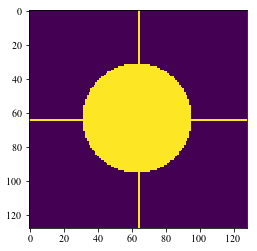

In [128]:
plt.imshow(C)

In [129]:
plt.imshow(C1)

NameError: name 'C1' is not defined

In [ ]:
C1 = C + 0.03*np.random.randn(*C.shape)
plt.imshow(C1)